<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [78]:
import pandas as pd
import gzip
import numpy as np
import matplotlib.pyplot as plt
similarity_file = r"C:\Data\HUJI\vcf\hgdp\classes\distances\all_mac_-1--1_maf_1-49_norm_dist.tsv.gz"

In [79]:
values = []
num_lines = 0

with gzip.open(similarity_file, 'rb') as sim_f:
    lines = sim_f.readlines()
    num_lines = len(lines)
    i = 0
    for l in lines:
        l_values = [float(n) for n in l.decode().split()]
        num_values_in_line = len(l_values)
        assert num_values_in_line == num_lines - i
        i += 1
        values = values + l_values
num_values = len(values)

In [80]:
print(f'file has {num_lines} lines, with {num_values} values')
valid = num_values == num_lines*(num_lines+1)/2
assert valid, 'num_values != num_lines*(num_lines+1)/2'
valid_str = 'valid' if valid else 'not valid'
print(f'number of values in file is {valid_str}')


file has 928 lines, with 431056 values
number of values in file is valid


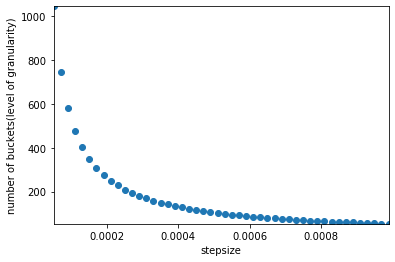

In [81]:
df = pd.DataFrame(values, columns = ['similarity'])
min_similarity = min(values)
max_similarity = max(values)
stepsize_x = np.arange(0.00005, 0.001, 0.00002).tolist()
num_buckts_y = []
for stepsize in stepsize_x:
    buckets = np.arange(min_similarity, max_similarity, stepsize).tolist()
    num_buckts_y.append(len(buckets))
    #plt.hist(df['similarity'], bins=buckets)
    #print(f'Stepsize: {stepsize}. \nRange: [{min_similarity},{max_similarity}]\nNumber of buckets: {len(buckets)}')
plt.scatter(stepsize_x, num_buckts_y)
plt.axis([min(stepsize_x),max(stepsize_x),min(num_buckts_y),max(num_buckts_y)])
#plt.yscale('log')
plt.ylabel('number of buckets(level of granularity)')
plt.xlabel('stepsize')
plt.show()

-----------------------------------
Histograms - number of edges in each bucket for selected step sizes
-----------------------------------
Stepsize: 5e-05. 
Range: [0.09924804148880187,0.1514816020193966]
Number of buckets: 1045


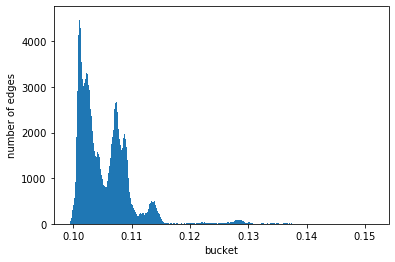

Stepsize: 7.5e-05. 
Range: [0.09924804148880187,0.1514816020193966]
Number of buckets: 697


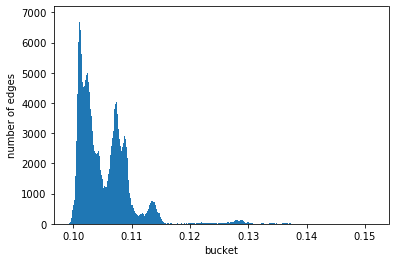

Stepsize: 0.0001. 
Range: [0.09924804148880187,0.1514816020193966]
Number of buckets: 523


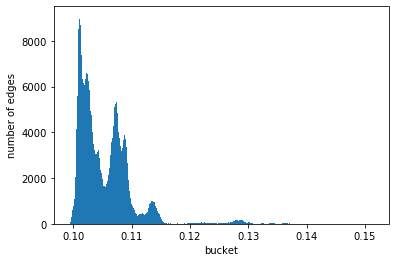

Stepsize: 0.00025. 
Range: [0.09924804148880187,0.1514816020193966]
Number of buckets: 209


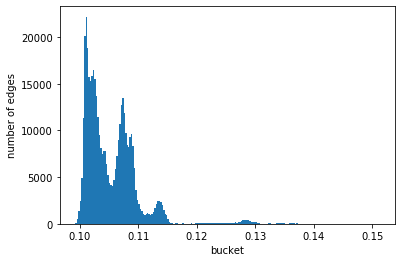

Stepsize: 0.0005. 
Range: [0.09924804148880187,0.1514816020193966]
Number of buckets: 105


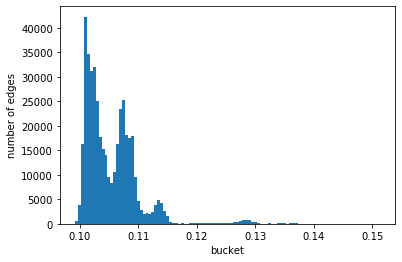

Stepsize: 0.00075. 
Range: [0.09924804148880187,0.1514816020193966]
Number of buckets: 70


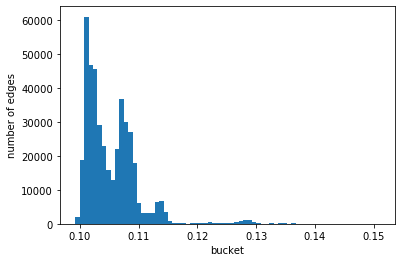

Stepsize: 0.001. 
Range: [0.09924804148880187,0.1514816020193966]
Number of buckets: 53


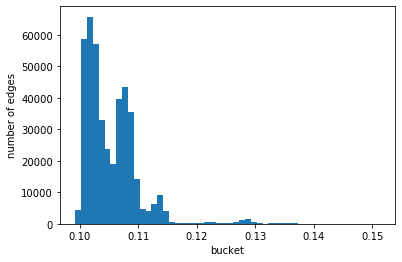

In [82]:
print(f'-----------------------------------')
print(f'Histograms - number of edges in each bucket for selected step sizes')
print(f'-----------------------------------')

for stepsize in [0.00005, 0.000075, 0.0001, 0.00025, 0.0005, 0.00075, 0.001]:
    buckets = np.arange(min_similarity, max_similarity, stepsize).tolist()
    plt.hist(df['similarity'], bins=buckets)
    plt.ylabel('number of edges')
    plt.xlabel('bucket')
    print(f'Stepsize: {stepsize}. \nRange: [{min_similarity},{max_similarity}]\nNumber of buckets: {len(buckets)}')
    plt.show()


In [ ]:
plt.hist(df['Age'], bins=[0,5,10,15,20,25,35,40,45,50])